# Star Wars Survey 

Using FiveThirtyEight's dataset on *Star Wars* surveys addressing the question: ***Does the rest of America realize that "The Empire Strikes Back" is clearly the best of the bunch?***, I will be exploring the dataset in this project to see what other conclusions come about. 

The data is available on FiveThirtyEight's [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) 

## Initial Setup

In [1]:
#read the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
star_wars = pd.read_csv('star_wars.csv', encoding="ISO-8859-1")

#explore the initial rows
print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [2]:
#explore the column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
#Explore what is in the columns that need to be expanded
star_wars.iloc[:, 9:19].head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker
1,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably
4,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably


In [4]:
star_wars.iloc[:, 19:38].head()

,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [5]:
#clean column names 
star_wars.rename({'Have you seen any of the 6 films in the Star Wars franchise?':'Seen any 6 Star Wars movies?',
                           'Do you consider yourself to be a fan of the Star Wars film franchise?':'Fan of Star Wars franchise?',
                           'Which of the following Star Wars films have you seen? Please select all that apply.':'The Phantom Menace Seen?',
                           'Unnamed: 4': 'Attack of the Clones Seen?',
                           'Unnamed: 5': 'Revenge of the Sith Seen?',
                           'Unnamed: 6': 'A New Hope Seen?',
                           'Unnamed: 7': 'The Empire Strikes Back Seen?',
                           'Unnamed: 8': 'Return of the Jedi Seen?',
                           'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'The Phantom Menace Rank',
                           'Unnamed: 10': 'Attack of the Clones Rank',
                           'Unnamed: 11': 'Revenge of the Sith Rank',
                           'Unnamed: 12': 'A New Hope Rank',
                           'Unnamed: 13': 'The Empire Strikes Back Rank',
                           'Unnamed: 14': 'Return of the Jedi Rank',
                           'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo Rank',
                           'Unnamed: 16': 'Luke Skywalker Rank',
                           'Unnamed: 17': 'Princess Leia Organa Rank',
                           'Unnamed: 18': 'Anakin Skywalker Rank',
                           'Unnamed: 19': 'Obi Wan Kenobi Rank',
                           'Unnamed: 20': 'Emperor Palpatine Rank',
                           'Unnamed: 21': 'Darth Vader Rank',
                           'Unnamed: 22': 'Lando Calrissian Rank',
                           'Unnamed: 23': 'Boba Fett Rank',
                           'Unnamed: 24': 'C-3PO Rank',
                           'Unnamed: 25': 'R2 D2 Rank',
                           'Unnamed: 26': 'Jar Jar Binks Rank',
                           'Unnamed: 27': 'Padme Amidala Rank',
                           'Unnamed: 28': 'Yoda Rank',
                           'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦': 'Familiar with Expanded Universe?'},
                           axis=1, inplace=True)

The first row is a dummy row that shows what response is selected for that column. For example, most of the "Unnamed: X" columns those are the choices for a question, and the choices are displayed in the first row. Instead of having the choices be in the first row, I have changed the name of the headers to reflect the choice for the questions the Unnamed columns are tied to. 

In [6]:
#shape of dataset
star_wars.shape

(1187, 38)

In [7]:
# drop the rows where RespondentID is NaN

star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

# pull the shape of the dataset again
star_wars.shape

(1186, 38)

There was one row where the 'RespondentID' had a null value. This row was that first dummy row I mentioned before. 

## Cleaning and Mapping Yes/No Columns

The columns "Seen any 6 Star Wars movies?" and "Fan of the Star Wars franchise?" are both Yes and No questions. Right now, these columns contain string datatype. It would easier to convert the data in these columns into Boolean types. Before I change the values to Booleans, I want to examine the unique values in these columns.

In [8]:
star_wars['Seen any 6 Star Wars movies?'].value_counts()

Yes    936
No     250
Name: Seen any 6 Star Wars movies?, dtype: int64

In [9]:
star_wars['Fan of Star Wars franchise?'].value_counts()

Yes    552
No     284
Name: Fan of Star Wars franchise?, dtype: int64

In [10]:
#create dictionary for mapping

yes_no = {'Yes' : True,
          'No' : False}

#map the booleans to the 'Seen any 6 Star Wars movies?' column

star_wars['Seen any 6 Star Wars movies?'] = star_wars['Seen any 6 Star Wars movies?'].map(yes_no)

#map the booleans to the 'Fan of Star Wars franchise?' column

star_wars['Fan of Star Wars franchise?'] = star_wars['Fan of Star Wars franchise?'].map(yes_no)


In [11]:
#verify the new values in the 'Seen any 6 Star Wars movies?' column
star_wars['Seen any 6 Star Wars movies?'].value_counts()

True     936
False    250
Name: Seen any 6 Star Wars movies?, dtype: int64

In [12]:
#verify the new values in the 'Fan of Star Wars franchise?' column
star_wars['Fan of Star Wars franchise?'].value_counts()

True     552
False    284
Name: Fan of Star Wars franchise?, dtype: int64

## Cleaning and Mapping the Checkbox Columns

There is a question on this dataset that is actually a checkbox question. 
- Which of the following Star Wars films have you seen? Please check all that apply.

The columns corresponded to a specific movie and asked whether a respondent saw it or not. 

The original columns for this question were:
- Which of the following Star Wars films have you seen? Please select all that apply. I renamed this one *The Phanton Menace Seen?*
- Unnamed: 4. I renamed this one *Attack of the Clones Seen?*
- Unnamed: 5. I renamed this one *Revenge of the Sith Seen?*
- Unnamed: 6. I renamed this one to *A New Hope Seen?*
- Unnamed: 7. I renamed this one to *The Empire Strikes Back Seen?*
- Unnamed: 8. I renamed this one to *Return of the Jedi Seen?*

In these columns, if the name of the movie is present that mean that they have seen it. If there is a null value, I am assuming the respondent did not see the movie. We could convert these columns to boolean values. 

In [13]:
#examine 'The Phantom Menace Seen?' column for creating the mapping dictionary
star_wars.head(1)


,RespondentID,Seen any 6 Star Wars movies?,Fan of Star Wars franchise?,The Phantom Menace Seen?,Attack of the Clones Seen?,Revenge of the Sith Seen?,A New Hope Seen?,The Empire Strikes Back Seen?,Return of the Jedi Seen?,The Phantom Menace Rank,...,Yoda Rank,Which character shot first?,Are you familiar with the Expanded Universe?,Familiar with Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


In [14]:
#create mapping dictionary for Star Wars movies seen columns
movie_seen_dict = {'Star Wars: Episode I  The Phantom Menace' : True,
                   'Star Wars: Episode II  Attack of the Clones' : True,
                   'Star Wars: Episode III  Revenge of the Sith' : True,
                   'Star Wars: Episode IV  A New Hope' : True,
                   'Star Wars: Episode V The Empire Strikes Back' : True,
                   'Star Wars: Episode VI Return of the Jedi' : True,
                    np.NaN : False}

#map to 'The Phantom Menace Seen?' column
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_seen_dict)
    
#verify changes
star_wars.iloc[:, 3:9].head()

,The Phantom Menace Seen?,Attack of the Clones Seen?,Revenge of the Sith Seen?,A New Hope Seen?,The Empire Strikes Back Seen?,Return of the Jedi Seen?
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


## Cleaning the Ranking Columns

The movie ranking columns can contain the value 1, 2, 3, 4, 5, 6 or NaN. As a results, let's see if the data is a float type.

In [15]:
#print the datatypes of the columns to see what dtype are the rank columns
star_wars.dtypes

RespondentID                                                        float64
Seen any 6 Star Wars movies?                                           bool
Fan of Star Wars franchise?                                          object
The Phantom Menace Seen?                                               bool
Attack of the Clones Seen?                                             bool
Revenge of the Sith Seen?                                              bool
A New Hope Seen?                                                       bool
The Empire Strikes Back Seen?                                          bool
Return of the Jedi Seen?                                               bool
The Phantom Menace Rank                                              object
Attack of the Clones Rank                                            object
Revenge of the Sith Rank                                             object
A New Hope Rank                                                      object
The Empire S

As we can see, the movie rank columns are 'object' dtype. Let's change it to a float type. 

In [16]:
#change rank columns to float dtype
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [17]:
#verify the changes
star_wars.dtypes

RespondentID                                                        float64
Seen any 6 Star Wars movies?                                           bool
Fan of Star Wars franchise?                                          object
The Phantom Menace Seen?                                               bool
Attack of the Clones Seen?                                             bool
Revenge of the Sith Seen?                                              bool
A New Hope Seen?                                                       bool
The Empire Strikes Back Seen?                                          bool
Return of the Jedi Seen?                                               bool
The Phantom Menace Rank                                             float64
Attack of the Clones Rank                                           float64
Revenge of the Sith Rank                                            float64
A New Hope Rank                                                     float64
The Empire S

## Finding the Highest-Ranked Movie

Now that I have cleaned the movie ranking columns, I can find what the respondents considered to be the highest ranked movie. 

First, let's find the mean of each of the movie rank columns. 

In [18]:
#create for loop to find the mean of the rank of each of the 6 movies
for col in star_wars.columns[9:15]:
    movie_ranking_avg = round(star_wars[col].mean(),2)
    print('{0:10} {1}'.format(col + ' Average:', movie_ranking_avg))

The Phantom Menace Rank Average: 3.73
Attack of the Clones Rank Average: 4.09
Revenge of the Sith Rank Average: 4.34
A New Hope Rank Average: 3.27
The Empire Strikes Back Rank Average: 2.51
Return of the Jedi Rank Average: 3.05


The rank system in this survey is that 1 is the top favorite and 6 is the least favorite. ***Episode V: The Empire Strikes Back*** is the movie that is ranked highest on average with a average rank of 2 out of 6. Without spoiling it, this particular Star Wars movie does contain one of the most referenced lines in cinema history.

The movie that was ranked lowest on average was ***Episode III: Revenge of the Sith*** with an average rank of 4 out of 6.

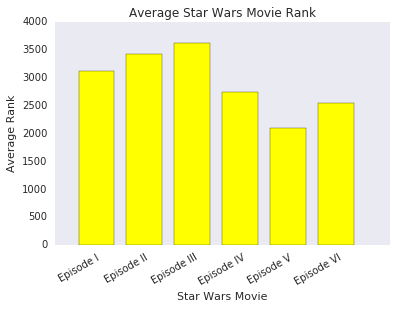

In [19]:
#visualize the data
from numpy import arange
%matplotlib inline

movies = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V',
          'Episode VI']
bar_positions = arange(6) + 0.5

fig, ax = plt.subplots()
ax.bar(bar_positions, star_wars[star_wars.columns[9:15]].sum(), 0.75, color='yellow')
ax.set_xticks(bar_positions)
ax.set_xticklabels(movies, rotation=30)
ax.set_xlabel("Star Wars Movie")
ax.set_ylabel("Average Rank")
ax.set_title("Average Star Wars Movie Rank")
ax.tick_params(bottom='off', right='off', left='off', top='off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#hide gridlines
ax.grid(False)

## Finding the Most Viewed Movie

In [20]:
#get the sum for the Star Wars Movie seen columns
star_wars[star_wars.columns[3:9]].sum()

The Phantom Menace Seen?         673
Attack of the Clones Seen?       571
Revenge of the Sith Seen?        550
A New Hope Seen?                 607
The Empire Strikes Back Seen?    758
Return of the Jedi Seen?         738
dtype: int64

Interestingly enough, the most viewed Star Wars Movie by the respondents was **Episode V: The Empire Strikes Back**, which is also the highest ranked movie by respondents. The least views movie was ***Episode III: Revenge of the Sith***, which was also the lowest ranked movie.

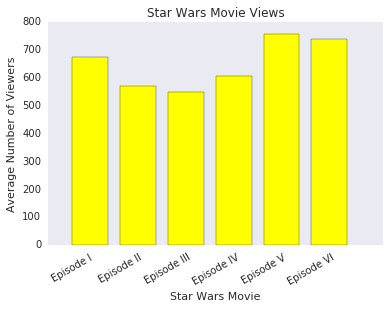

In [21]:
%matplotlib inline

fig, ax = plt.subplots()
ax.bar(bar_positions, star_wars[star_wars.columns[3:9]].sum(), 0.75, color='yellow')
ax.set_xticks(bar_positions)
ax.set_xticklabels(movies, rotation=30)
ax.set_xlabel("Star Wars Movie")
ax.set_ylabel("Average Number of Viewers")
ax.set_title("Star Wars Movie Views")
ax.tick_params(bottom='off', right='off', left='off', top='off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#hide gridlines
ax.grid(False)


## Exploring the Data by Segments

Let's explore the most viewed movie and the highest-ranked movie by gender.

In [22]:
#breakdown the gender column
star_wars["Gender"].value_counts()

Female    549
Male      497
Name: Gender, dtype: int64

In [23]:
#split data into two groups based on gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

#average Star Wars movie ranks by male respondents
round(males[males.columns[9:15]].mean(),3)

The Phantom Menace Rank         4.038
Attack of the Clones Rank       4.225
Revenge of the Sith Rank        4.275
A New Hope Rank                 2.998
The Empire Strikes Back Rank    2.459
Return of the Jedi Rank         3.002
dtype: float64

In [24]:
#average Star Wars movie ranks by female respondents
round(females[females.columns[9:15]].mean(),3)

The Phantom Menace Rank         3.429
Attack of the Clones Rank       3.955
Revenge of the Sith Rank        4.418
A New Hope Rank                 3.544
The Empire Strikes Back Rank    2.569
Return of the Jedi Rank         3.078
dtype: float64

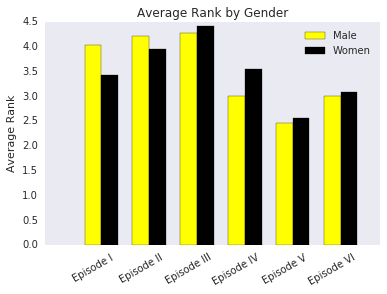

In [25]:
male_ranks = males[males.columns[9:15]].mean()
female_ranks = females[females.columns[9:15]].mean()

x = np.arange(len(movies))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_ranks, width, label='Male',color='yellow')
rects2 = ax.bar(x + width/2, female_ranks, width, label='Women',color='black')
ax.set_ylabel('Average Rank')
ax.set_title('Average Rank by Gender')
ax.set_xticks(x)
ax.set_xticklabels(movies, rotation=30)
ax.legend()

#hide gridlines
ax.grid(False)

The female respondents ranked the first two prequel movies *(Episode I and II)* higher than the male respondents. Female respondents also ranked *Episode IV: A New Hope* lower than the male respondents. 

In [26]:
#movie views by male respondents
male_views = males[males.columns[3:9]].sum()

#movie views by female respondents
female_views = females[females.columns[3:9]].sum()

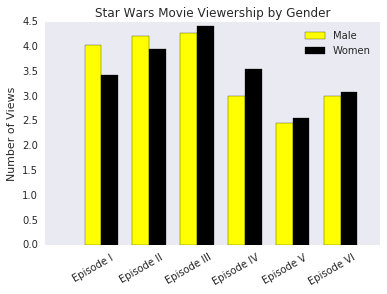

In [27]:
#visualize comparison of viewership between genders
%matplotlib inline

x = np.arange(len(movies))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_ranks, width, label='Male',color='yellow')
rects2 = ax.bar(x + width/2, female_ranks, width, label='Women',color='black')
ax.set_ylabel('Number of Views')
ax.set_title('Star Wars Movie Viewership by Gender')
ax.set_xticks(x)
ax.set_xticklabels(movies, rotation=30)
ax.legend()

#hide gridlines
ax.grid(False)

At a glance, less female respondents viewed the Star Wars movies. for example, ***Episode III - Revenge of the Sith*** was viewed by 222 out of the 549 female respondents. The same movie was watched by 317 out of the 497 male respondents. However, both genders had similar patterns in viewership. ***Episode I - The Phantom Menace*** was the most viewed prequel by both groups. Also ***Episode V - The Empire Strikes Back*** and ***Episode VI - Return of the Jedi*** had the most views in both groups of respondents. 